In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

<AxesSubplot:xlabel='x', ylabel='y'>

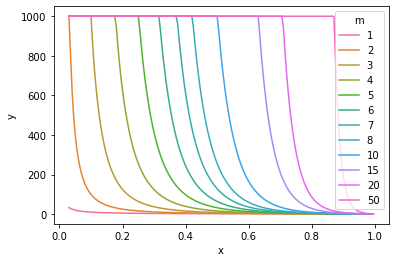

In [11]:
start = 0.03
stop = 1
step=0.005
x = np.arange(start, stop, step)
m_choices = [1,2,3,4,5,6,7,8,10,15,20,50]
data = {
    'x': [],
    'y': [],
    'm': []
}
for m in m_choices:
    m_list = [m]*x.size
    y = (1/x)**m
    y = np.clip(y,None,1000)
    data['x'].extend(x.tolist())
    data['y'].extend(y.tolist())
    data['m'].extend(m_list)
    
df = pd.DataFrame(data)
df['m'] = df['m'].astype('category')
sns.lineplot(x='x', y='y', hue='m', data=df)

<AxesSubplot:xlabel='x', ylabel='y'>

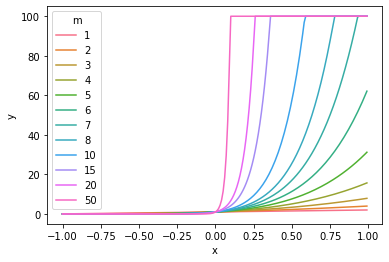

In [5]:
start = -1
stop = 1
step=0.01
x = np.arange(start, stop, step)
data = {
    'x': [],
    'y': [],
    'm': []
}
for m in m_choices:
    m_list = [m]*x.size
    y = (x + 1)**m
    y = np.clip(y, None, 100)
    data['x'].extend(x.tolist())
    data['y'].extend(y.tolist())
    data['m'].extend(m_list)
    
df = pd.DataFrame(data)
df['m'] = df['m'].astype('category')
sns.lineplot(x='x', y='y', hue='m', data=df)

# KDEpy testing

In [90]:
from KDEpy import TreeKDE, FFTKDE, NaiveKDE
import matplotlib.pyplot as plt

[0.04343529 0.04849704 0.05148549 0.05153323 0.05326242 0.05169077
 0.04979397 0.04871153 0.00649552 0.01692335 0.00607893]


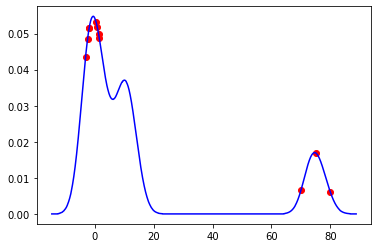

In [35]:
c1 = np.random.normal(size=4,loc=-2, scale=1)
c2 = np.random.normal(size=6,loc=1, scale=4)
c3 = np.random.normal(size=7,loc=10, scale=2)
c4 = np.random.normal(size=3,loc=75, scale=2)
data = np.concatenate((c1,c2,c3,c4))
kde = TreeKDE(kernel='gaussian',bw=3).fit(data=data)
x,y=kde.evaluate(5000)
x_2 = np.array([-3.23, -2.54, -2.01, -2, 0.34, 0.78, 1.23, 1.45, 70,75,80])
y_2 = kde.evaluate(x_2)
print(y_2)
plt.scatter(x_2, y_2, c='red')
plt.plot(x,y, c= "blue")

<AxesSubplot:>

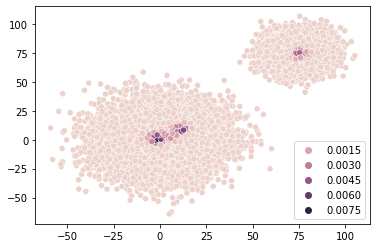

In [116]:
c1 = np.random.normal(size=(14,2),loc=(-2,1), scale=1)
c2 = np.random.normal(size=(16,2),loc=(1,0), scale=4)
c3 = np.random.normal(size=(17,2),loc=(10,10), scale=2)
c4 = np.random.normal(size=(13,2),loc=(75,75), scale=2)
data = np.concatenate((c1,c2,c3,c4))
kde = NaiveKDE(kernel='gaussian',bw=2.25).fit(data=data)

c1 = np.random.normal(size=(10000,2),loc=(-2,1), scale=4)
c2 = np.random.normal(size=(10000,2),loc=(1,0), scale=16)
c3 = np.random.normal(size=(10000,2),loc=(10,10), scale=8)
c4 = np.random.normal(size=(10000,2),loc=(75,75), scale=8)
x=np.concatenate((c1,c2,c3,c4))
y=kde.evaluate(x)
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y)

In [114]:
y.shape

(40000,)

In [115]:
print(np.min(y), np.max(y))

1.1021436887660658e-07 0.007843511813242313


dict_keys(['silverman', 'scott', 'ISJ'])